## Imports

In [19]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import speckleret

## Load pre-computed example speckle

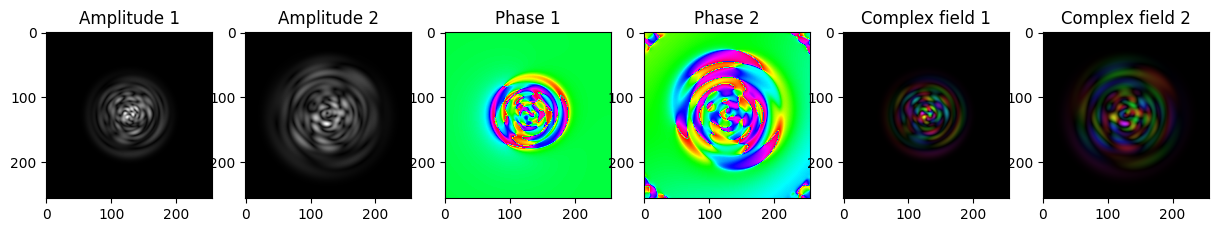

In [35]:
field = np.load('../imports/grin_speckle_example.npy')
ft = speckleret.transforms.fourier_transform(field, pad=2)
_ = speckleret.plots.compare_complex_fields(field, ft)

## Generate a noisy field

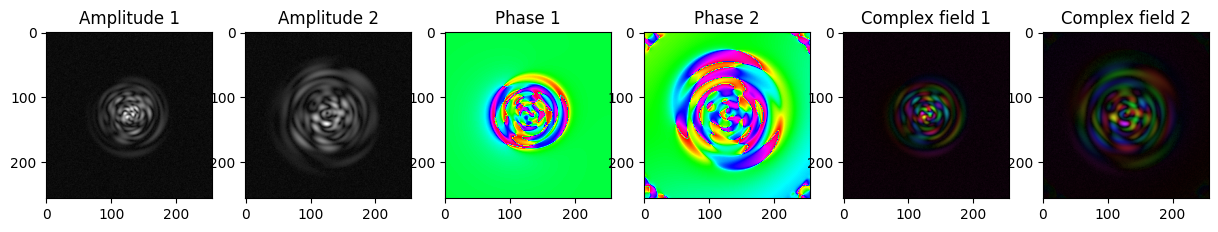

In [38]:
noisy_field = speckleret.noise.add_complex_noise(field, intens_noise_std=0.003, phase_noise_std=0, wavelength=1064e-9)
noisy_ft = speckleret.noise.add_complex_noise(ft, intens_noise_std=0.003, phase_noise_std=0, wavelength=1064e-9)
# noisy_ft = speckleret.transforms.fourier_transform(noisy_field, pad=2)
_ = speckleret.plots.compare_complex_fields(noisy_field, noisy_ft)

## Generate and visualize support

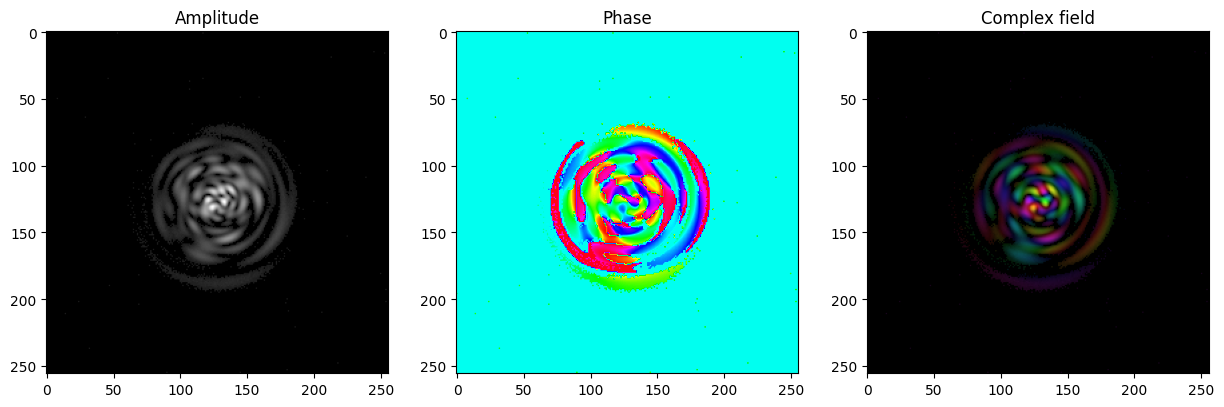

In [44]:
support = speckleret.supports.threshold_support(noisy_field, threshold=0.01)
supported_field = noisy_field * support
_ = speckleret.plots.complex_imshow(supported_field)

## Run retrieval and show convergence and metrics

1 / 5
2 / 5
3 / 5
4 / 5
5 / 5
Quality: 0.8951766949999667
Pearson: 0.9632718607364538


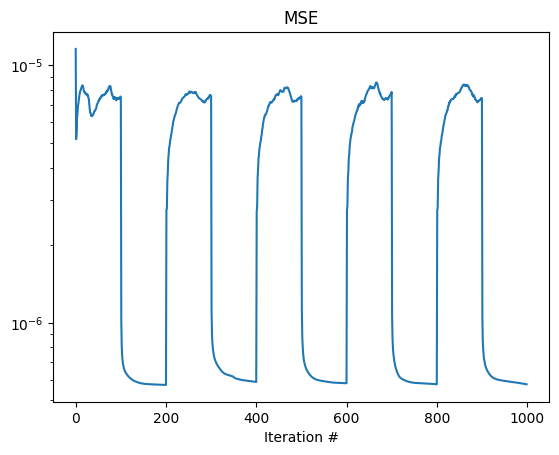

In [45]:
y_hat, ft_hat, results = speckleret.retrieval.hio_er_fourier((np.abs(noisy_field), np.abs(noisy_ft)), support, pad=2, max_iter=5, max_er_iter=100, max_hio_iter=100)

print(f"Quality: {speckleret.metrics.quality(y_hat, noisy_field)}")
print(f"Pearson: {speckleret.metrics.pearson(y_hat, noisy_field)}")

plt.figure()
plt.plot(results['mse_plane2'], label='Fourier MSE')
plt.title('MSE')
plt.xlabel('Iteration #')
plt.yscale('log')

## Compare retrieved field with initial field

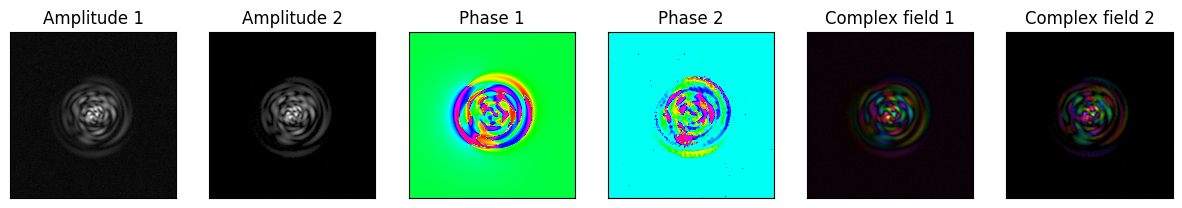

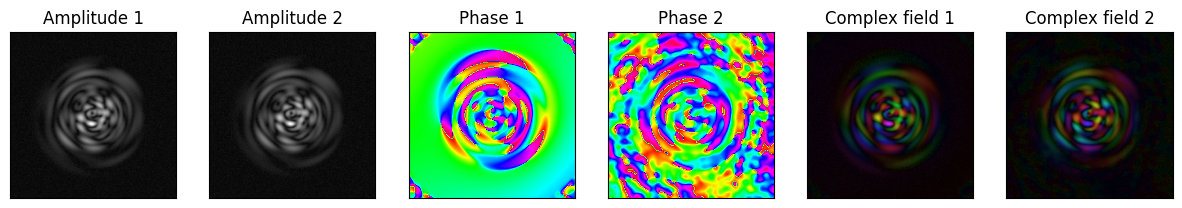

In [46]:
_ = speckleret.plots.compare_complex_fields(noisy_field, y_hat, remove_ticks=True)
_ = speckleret.plots.compare_complex_fields(noisy_ft, ft_hat, remove_ticks=True)